## CUvids: Data for Summer Instructors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

In [5]:
df1 = pd.read_csv("/Users/avacrnkovic-rubsamen/Desktop/data1/watch_list_2020_05_18_to_2020_05_24 copy.csv")
df2 = pd.read_csv("/Users/avacrnkovic-rubsamen/Desktop/data1/watch_list_2020_05_25_to_2020_05_31 copy.csv")
df3 = pd.read_csv("/Users/avacrnkovic-rubsamen/Desktop/data1/watch_list_2020_06_01_to_2020_06_07 copy.csv")
df4 = pd.concat([df1, df2, df3])

df4 = pd.read_csv("/Users/avacrnkovic-rubsamen/Desktop/watch_list_2020_06_08_to_2020_06_14.csv")
df5 = pd.read_csv("/Users/avacrnkovic-rubsamen/Desktop/data1/watch_list_2020_06_15_to_2020_06_21.csv")
df6 = pd.read_csv("/Users/avacrnkovic-rubsamen/Desktop/watch_list_2020_06_29_to_2020_07_05 copy.csv")

df_all = pd.concat([df1, df2, df3, df4, df5, df6])

#df_all.to_csv('watches.csv', index=False, sep=";")
df_all.head()

,Video Id,Youtube Id,Video Name,User Id,Username,Email,Watch Timestamp,Watch Video Time,Watch Playback Rate,Watch Poll Rate
0,1,xLsIco77HrY,Brief overview,2955,radhikapallavi@yahoo.com,radhikapallavi@yahoo.com,2020-05-19T23:03:27.448Z,1.846084,1.0,5000
1,1,xLsIco77HrY,Brief overview,2955,radhikapallavi@yahoo.com,radhikapallavi@yahoo.com,2020-05-19T23:03:32.386Z,6.851055,1.0,5000
2,1,xLsIco77HrY,Brief overview,2955,radhikapallavi@yahoo.com,radhikapallavi@yahoo.com,2020-05-19T23:03:37.739Z,11.854831,1.0,5000
3,1,xLsIco77HrY,Brief overview,2955,radhikapallavi@yahoo.com,radhikapallavi@yahoo.com,2020-05-19T23:03:42.892Z,16.857568,1.0,5000
4,1,xLsIco77HrY,Brief overview,2955,radhikapallavi@yahoo.com,radhikapallavi@yahoo.com,2020-05-19T23:03:47.410Z,21.859461,1.0,5000


In [17]:
import glob
import os
os.chdir("/Users/avacrnkovic-rubsamen/Desktop/09-2019-to-06-2020")
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
all_year = pd.concat([pd.read_csv(f) for f in all_filenames ])
all_year.head()

,Video Id,Youtube Id,Video Name,User Id,Username,Email,Watch Timestamp,Watch Video Time,Watch Playback Rate,Watch Poll Rate
0,1,xLsIco77HrY,Brief overview,348,cas-rutgers-university-my368,NaN,2019-09-17T22:32:40.408Z,0.125348,1.0,5000
1,1,xLsIco77HrY,Brief overview,351,dparekh2019@gmail.com,dparekh2019@gmail.com,2019-09-17T23:00:30.451Z,0.044440,1.0,5000
2,1,xLsIco77HrY,Brief overview,351,dparekh2019@gmail.com,dparekh2019@gmail.com,2019-09-17T23:00:35.459Z,5.053233,1.0,5000
3,1,xLsIco77HrY,Brief overview,388,cas-rutgers-university-jc2135,NaN,2019-09-18T03:08:50.481Z,2.256801,1.0,5000
4,1,xLsIco77HrY,Brief overview,388,cas-rutgers-university-jc2135,NaN,2019-09-18T03:28:14.202Z,4.376654,1.0,5000


In [34]:
# creating all year data table
data_table1 = all_year.groupby('Video Id').count()[['Watch Video Time']] / 360
data_table2 = all_year.groupby('Video Id')['User Id'].apply(set)
data_table = pd.concat([data_table1, data_table2], axis=1)
data_table = data_table.rename(columns={'Watch Video Time': 'Total Watches'})
data_table['Total Users'] = data_table['User Id'].str.len()
data_table['Average Speed'] = all_year.groupby('Video Id')['Watch Playback Rate'].mean()
data_table = data_table.drop(columns=['User Id'])
data_table.head()
data_table.head(204).to_csv('09-2019-to-06-2020_data_table.csv')

In [3]:
# create video_table csv
new = df.groupby('Video Id').count()[['Watch Video Time']]
new2 = df.groupby('Video Id')['User Id'].apply(set)
new3 = df.groupby('Video Id')['Email'].apply(set)
video_table = pd.concat([new, new2, new3], axis=1)
video_table.head()
#video_table.to_csv('video_table02.csv')

,Watch Video Time,User Id,Email
Video Id,,,
1,69,"{3422, 2379, 3373, 1522, 3161, 3386, 3390}","{nan, chihung10c4@gmail.com, saikumarreddy195@..."
2,149,"{3422, 2379, 3161, 3386, 3390}","{nan, chihung10c4@gmail.com, saikumarreddy195@..."
3,13923,"{3422, 69, 3161, 3386, 3390}","{nan, chihung10c4@gmail.com, admin@acurate.io,..."
4,302,"{3386, 2988, 3410}","{nan, 2016000000115@seu.edu.bd, kaylavanren@gm..."
5,71,"{3386, 3410, 69}","{nan, admin@acurate.io, kaylavanren@gmail.com}"


In [4]:
# create csv sorted by email domain
df['Domain'] = df['Email'].str.split('@').str[1]
email = df.sort_values(by=['Domain'])
email.head()
#email.to_csv('sorted_by_domain.csv')

,Video Id,Youtube Id,Video Name,User Id,Username,Email,Watch Timestamp,Watch Video Time,Watch Playback Rate,Watch Poll Rate,Domain
66254,1679,G4z6h_DcV4c,16 System Level I O,3407,liumingjian2505@163.com,liumingjian2505@163.com,2020-06-10T11:29:14.146Z,8.845232,1.0,10000,163.com
66253,1679,G4z6h_DcV4c,16 System Level I O,3407,liumingjian2505@163.com,liumingjian2505@163.com,2020-06-10T11:29:04.155Z,0.229337,1.0,10000,163.com
36418,97,gfSpPbJWzVs,1.A Dynamic Connectivity,69,acurate_admin,admin@acurate.io,2020-06-12T15:48:16.684Z,0.119543,1.0,10000,acurate.io
64864,402,TBbAIZYP7BM,Foundations of Sorting and Searching,69,acurate_admin,admin@acurate.io,2020-06-12T16:40:49.283Z,39.152947,1.0,10000,acurate.io
64863,402,TBbAIZYP7BM,Foundations of Sorting and Searching,69,acurate_admin,admin@acurate.io,2020-06-12T16:40:39.279Z,29.003737,1.0,10000,acurate.io


In [3]:
# create user_table csv
user1 = df.groupby('User Id').count()['Watch Timestamp']
user2 = df.groupby('User Id')['Video Id'].apply(set)
user3 = df.groupby('User Id')['Email'].first()
user_table = pd.concat([user3, user2, user1], axis=1)
user_table.head()
#user_table.to_csv('user_table_2020_06_08_to_2020_06_14.csv')

,Email,Video Id,Watch Timestamp
User Id,,,
69,admin@acurate.io,"{1, 4, 10, 1806, 1807, 1808, 1810, 21, 405, 18...",100
98,pgishantha.fit@gmail.com,{1029},4
101,guna@andrew.cmu.edu,"{2, 3}",82
773,andyguna4@gmail.com,"{1800, 1780}",2
893,NaN,"{98, 99, 100}",88


In [10]:
# creating graph of watches by user id
graph1 = df.groupby('User Id', as_index=False).count()['Watch Timestamp']
graph2 = df.groupby('User Id', as_index=False).first()['User Id']

graph_table = pd.concat([graph1, graph2], axis=1)
graph = graph_table.rename(columns={'Watch Timestamp': 'Total Watches'})
graph = graph.sort_values(by=['Total Watches'])

graph.tail()

,Total Watches,User Id
18,1766,2337
78,2239,3161
140,2330,3410
95,3357,3258
132,13766,3390


In [7]:
# dropping user who had over 10,000 more watches than the second highest
graph = graph.drop([132], axis=0)
graph.tail()

,Total Watches,User Id
81,1460,3199
18,1766,2337
78,2239,3161
140,2330,3410
95,3357,3258


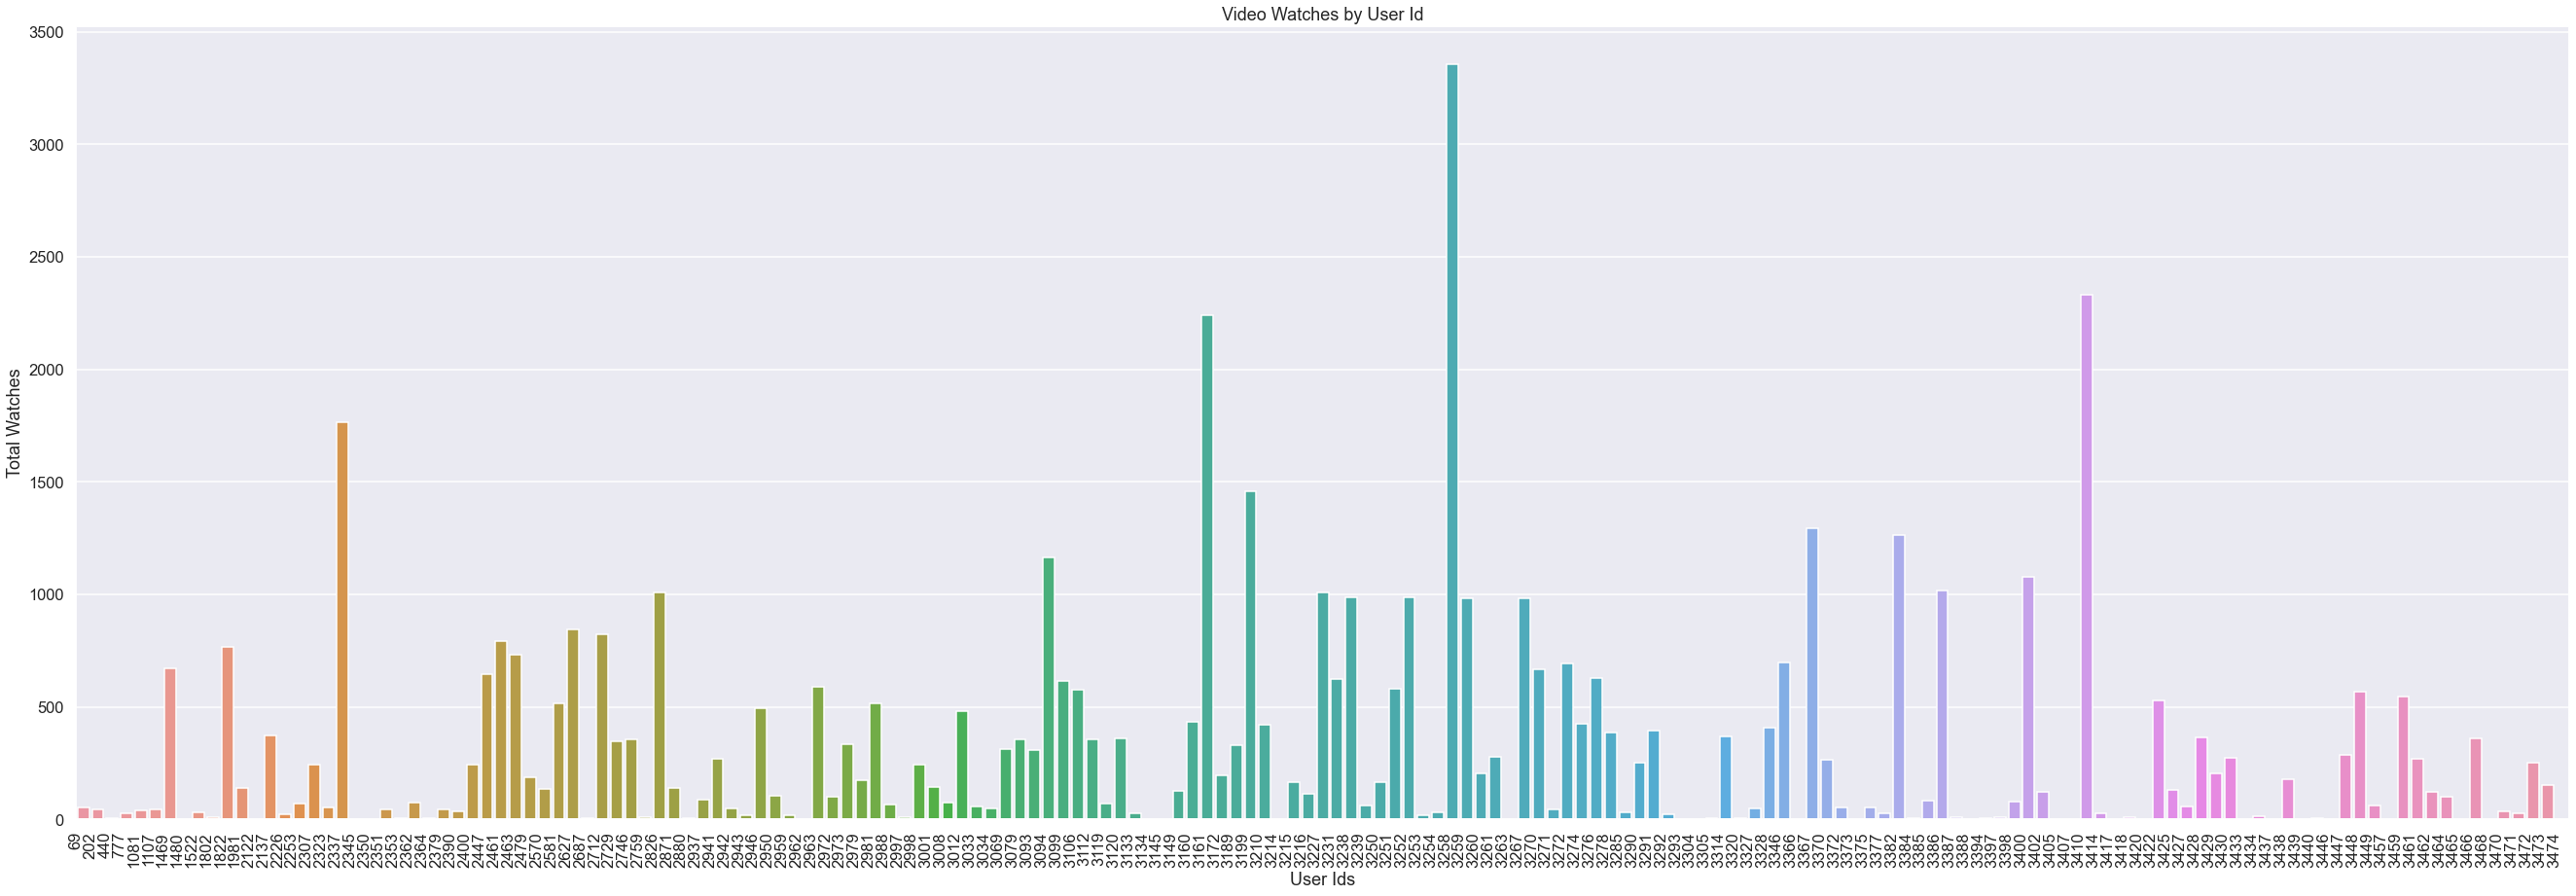

In [9]:
# graph of video watches by user id
plt.figure(figsize=(90,15))
plt.subplot(121)
ax = sns.barplot(x="User Id", y='Total Watches', data = graph)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set(xlabel='User Ids')
ax.set(title='Video Watches by User Id')

plt.show()

In [47]:
# graph of most popular day to watch videos
import datetime as dt
time = df.groupby('Watch Timestamp', as_index=False)['Video Id'].count()
time = time.rename(columns={'Watch Timestamp': 'Date', 'Video Id': 'Total Watches'})
time['Date'] = pd.to_datetime(time.Date)
time['Date'] = time['Date'].dt.strftime('%m/%d/%Y')
time = time.groupby('Date').count()

time.head()

,Total Watches
Date,
06/08/2020,10988
06/09/2020,7764
06/10/2020,6319
06/11/2020,11523
06/12/2020,8517


[Text(0.5, 1.0, 'Video Watches by Day (Monday - Sunday)')]

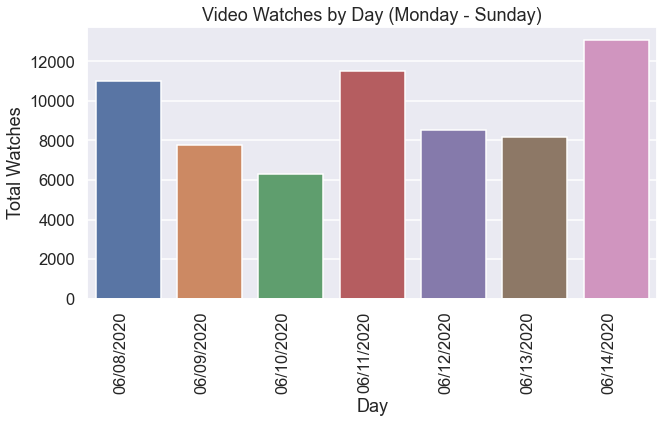

In [48]:
# 1 week of data
plt.figure(figsize=(20,5))

plt.subplot(121)
ax = sns.barplot(x=time.index, y='Total Watches', data = time)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set(xlabel='Day')
ax.set(title='Video Watches by Day (Monday - Sunday)')

In [69]:
# four weeks of data with date
df_4weeks = pd.concat([df4, df])
time4 = df_4weeks.groupby('Watch Timestamp', as_index=False)['Video Id'].count()
time4 = time4.rename(columns={'Watch Timestamp': 'Date', 'Video Id': 'Total Watches'})
time4['Date'] = pd.to_datetime(time4.Date)
time4['Date'] = time4['Date'].dt.strftime('%m/%d/%Y')
time4 = time4.groupby('Date').count()
time4.head(n=21)

,Total Watches
Date,
05/18/2020,25251
05/19/2020,21154
05/20/2020,27998
05/21/2020,15665
05/22/2020,11732
05/23/2020,12334
05/24/2020,10013
05/25/2020,11896
05/26/2020,8446


[Text(0.5, 1.0, 'Number of Video Watches per Day for a Month')]

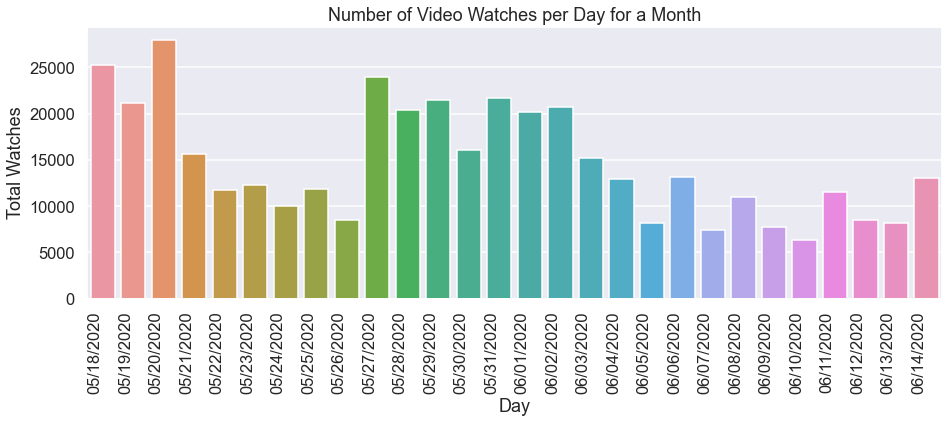

In [56]:
# 4 weeks of data
plt.figure(figsize=(30,5))

plt.subplot(121)
ax = sns.barplot(x=time4.index, y='Total Watches', data = time4)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set(xlabel='Day')
ax.set(ylabel='Total Watches')
ax.set(title='Number of Video Watches per Day for a Month')

In [84]:
# 4 weeks of data with day of the week
dayofweek = df_4weeks.groupby('Watch Timestamp', as_index=False)['Video Id'].count()
dayofweek = dayofweek.rename(columns={'Watch Timestamp': 'Date', 'Video Id': 'Total Watches'})
dayofweek['Date'] = pd.to_datetime(dayofweek.Date)
dayofweek['Weekday'] = dayofweek['Date'].dt.dayofweek

dayofweek['Date'] = dayofweek['Date'].dt.strftime('%m/%d/%Y')
time4a = dayofweek.groupby('Date')['Total Watches'].count()
time4b = dayofweek.groupby('Date')['Weekday'].first()
dayofweek = pd.concat([time4a, time4b], axis=1)

dayofweek.head()

,Total Watches,Weekday
Date,,
05/18/2020,25251,0
05/19/2020,21154,1
05/20/2020,27998,2
05/21/2020,15665,3
05/22/2020,11732,4


In [85]:
dayofweek1 = dayofweek.groupby('Weekday', as_index=False)['Total Watches'].sum()
dayofweek1.head()

,Weekday,Total Watches
0,0,68285
1,1,58076
2,2,73488
3,3,60475
4,4,49917


[Text(0.5, 1.0, 'Number of Video Watches per Day of the Week')]

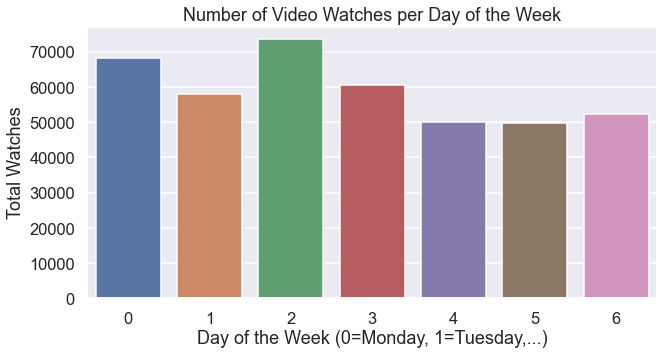

In [86]:
# 1 month of data -- video watches per week day
plt.figure(figsize=(20,5))

plt.subplot(121)
ax = sns.barplot(x=dayofweek1.index, y='Total Watches', data = dayofweek1)
ax.set(xlabel='Day of the Week (0=Monday, 1=Tuesday,...)')
ax.set(ylabel='Total Watches')
ax.set(title='Number of Video Watches per Day of the Week')

In [4]:
df_qs = pd.read_csv("/Users/avacrnkovic-rubsamen/Desktop/data1/user_answers_2020_06_12_to_2020_06_26.csv")
df_qs.head()

,Date Time,User ID,Email,Username,Video Id,Video Location,Question Id,Answer Id,Is Correct
0,2020-06-13T02:33:51.449,3034,NaN,cas-princeton-university-kyuh,98,610,103,404,True
1,2020-06-13T06:29:00.634,3238,cy1@wellesley.edu,cy1@wellesley.edu,129,767,132,521,False
2,2020-06-13T06:29:03.155,3238,cy1@wellesley.edu,cy1@wellesley.edu,129,767,132,520,False
3,2020-06-13T06:29:12.651,3238,cy1@wellesley.edu,cy1@wellesley.edu,129,767,132,519,True
4,2020-06-13T06:58:53.769,3238,cy1@wellesley.edu,cy1@wellesley.edu,130,232,133,525,True


In [56]:
# userID, userEmail, totalAttempts, Percentage Right, videos ID's(set), question ID's (set)
#graph1 = df_qs.groupby('User ID')['Video Id'].apply(set)
graph3 = df_qs.groupby('User ID')['Email'].first()
graph4 = df_qs.groupby('User ID')['Is Correct'].apply(lambda x: (x == True).sum())
graph_table = pd.concat([graph3, graph4], axis=1)
graph_table['Total Attempts'] = df_qs.groupby('User ID').count()['Date Time']
graph_table['Is Correct'] = (graph_table['Is Correct'] / graph_table['Total Attempts']) * 100
graph_table = graph_table.rename(columns={'Is Correct': 'Percent Correct'})
graph_table['Video ID'] = df_qs.groupby('User ID')['Video Id'].apply(set)
graph_table['Question ID'] = df_qs.groupby('User ID')['Question Id'].apply(set)
graph_table.head()

,Email,Percent Correct,Total Attempts,Video ID,Question ID
User ID,,,,,
1390,zsg6@scarletmail.rutgers.edu,100.000000,1,{59},{61}
2020,vnwaokocha@gmail.com,100.000000,2,"{162, 163}","{165, 166}"
2137,lindokuhlenkamela@gmail.com,69.444444,36,"{10, 11, 12, 17, 24, 25, 26, 28, 29, 30}","{32, 33, 832, 36, 37, 38, 13, 14, 15, 815, 821..."
2236,zhengguo.gu@hotmail.com,100.000000,1,{31},{74}
2307,24136476@sun.ac.za,86.956522,23,"{17, 14}","{847, 17, 21, 22, 828}"


In [110]:
graph_table.to_csv('questions.csv')

In [57]:
#graph_table.groupby('Email', as_index=True)
#graph_table.filter(regex='.*^(edu)', axis=0).head()
graph_table[graph_table['Email'].str.contains('.*^edu')==True].head()

,Email,Percent Correct,Total Attempts,Video ID,Question ID
User ID,,,,,


In [39]:
questions = pd.read_csv("/Users/avacrnkovic-rubsamen/Desktop/data1/user_answers_2020_06_29_to_2020_07_05.csv")
questions.tail()

,Date Time,User ID,Email,Username,Video Id,Video Location,Question Id,Answer Id,Is Correct
1371,2020-07-05T22:57:06.809,3386,NaN,cas-princeton-university-jdouvas,52,558,43,164,True
1372,2020-07-05T22:57:06.809,3386,NaN,cas-princeton-university-jdouvas,52,558,43,165,True
1373,2020-07-05T22:57:06.809,3386,NaN,cas-princeton-university-jdouvas,52,558,43,167,True
1374,2020-07-05T22:57:41.900,3386,NaN,cas-princeton-university-jdouvas,52,480,858,3403,False
1375,2020-07-05T22:57:45.748,3386,NaN,cas-princeton-university-jdouvas,52,480,858,3404,True


In [38]:
question_table = questions.groupby('User ID')['Username'].first()
for index in range(1, 95):
    question_table['Question { index }'] = question_table 

question_table.head()

User ID
1107                   cas-slcc-yhou
2137     lindokuhlenkamela@gmail.com
2336              onkayi88@gmail.com
2589              23269428@sun.ac.za
2712    cas-rutgers-university-dh624
Name: Username, dtype: object